In [16]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
import json
acc_score = od()

In [17]:
def get_entropy_from_culling_factor(c):
    S = od()
    for E in range(-len(c), 1):
        if E in c:
            S[E] = np.log(c[E])
        for E1 in c:
            if (E1 > E):
                S[E] += np.log(1 - c[E1])
    return S

def get_entropy_from_culling_factor_with_heat(c):
    S = od()
    for E in range(-len(c) + 1, 1):
        if E in c:
            S[E + 2] = np.log(c[E])
        for E1 in c:
            if (E1 < E):
                S[E + 2] += np.log(1 - c[E1])
    return S

In [18]:
def read_files(parameters):
    q=parameters["q"];
    L=parameters["L"];
    R=parameters["R"];
    nSteps=parameters["nSteps"];
    seed=parameters["seed"];
    heat=parameters["heat"];
    N = L * L;
    name = "./datasets/2DHexPotts{}_q{}_N{}_R{}_nSteps{}_run{}X.txt".format("Heating" * heat, q, N, R, nSteps, seed)
    culling_factor = od()
    print(N, R, nSteps, heat)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c

    parameters["culling_factor"] = culling_factor
    if not heat:
        parameters["S"] = get_entropy_from_culling_factor(culling_factor)
    else:
        parameters["S"] = get_entropy_from_culling_factor_with_heat(culling_factor)
    
    return parameters

In [19]:
heat, cool = {
    "q": 4,
    "L": 12,
    "R" : 524288,
    "nSteps" : 50,
    "seed" : 0,
    "heat": True
}, {
    "q": 4,
    "L": 12,
    "R" : 524288,
    "nSteps" : 50,
    "seed" : 0,
    "heat": False
}

for parameters in [heat, cool]:
    parameters = read_files(parameters)

144 524288 50 True
144 524288 50 False


C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\marvelouslim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [32]:
12*12*3/2

216.0

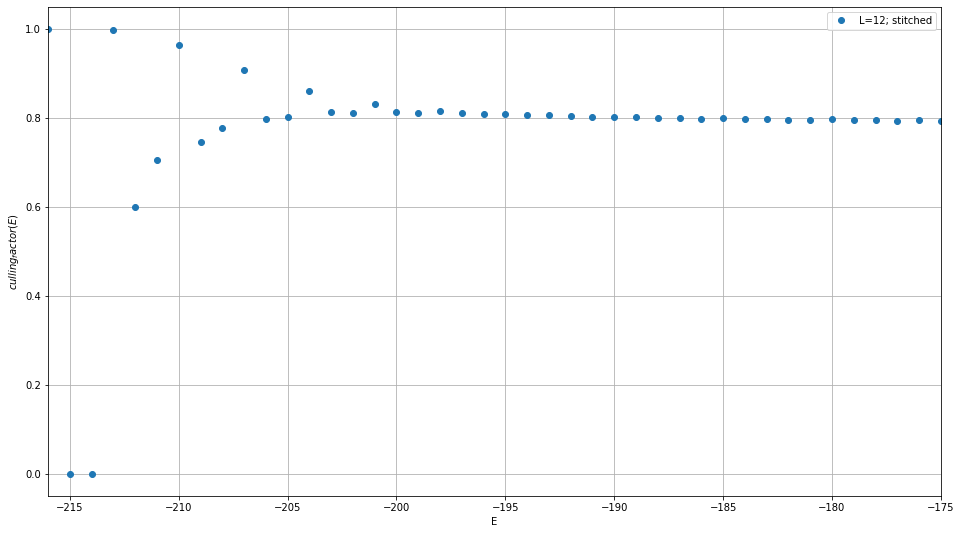

In [33]:
plt.figure(figsize=(16, 9))
lst = [12]

for L in lst:
    
    plt.plot([E for E in cool["culling_factor"]], [S for E, S in cool["culling_factor"].items()], 'o', label="L={}; stitched".format(heat["L"]))
    

plt.ylabel("$culling_factor(E)$")
plt.xlabel("E")
#plt.ylim([-200, -175])
plt.xlim([-216, -175])
plt.legend()
plt.grid()

In [20]:
def stitch_S(heat, cool):
    #not infinite values
    niv = sorted( list({E for E, S in heat["S"].items() if not np.isinf(S)} & {E for E, S in cool["S"].items() if not np.isinf(S)}) )
    #chosen not infinite values
    cniv = niv[len(niv) // 3 : 2 * len(niv) // 3]
    shift = 0
    count = 0
    for E in cniv:
        shift += heat["S"][E] - cool["S"][E]
        count += 1
    shift /= count

    result = od()
    for E in range(- 3 * heat["L"] ** 2 // 2, 1):
        if E < max(cniv):
            result[E] = cool["S"][E]
        elif E >= max(cniv):
            result[E] = heat["S"][E] - shift    
    return result

In [21]:
stitched = stitch_S(heat, cool)

In [22]:
def analytical_S(q, L):
    N = L * L
    E0 = - 3 * N // 2
    result = {
        E0: np.log(q),
        E0 + 3: np.log(q) + np.log(N) + np.log(q - 1),
        E0 + 4: np.log(q) + np.log(N) + np.log(q - 1) + np.log(3 / 2),
        E0 + 5: np.log(1.5 * q * N * (q - 1) * (q - 2) + 3 * q * N * (q - 1))
    }
    for E in result:
        result[E] += cool["S"][E0] - np.log(q)
    return result

In [23]:
analytical = analytical_S(cool["q"], cool["L"])

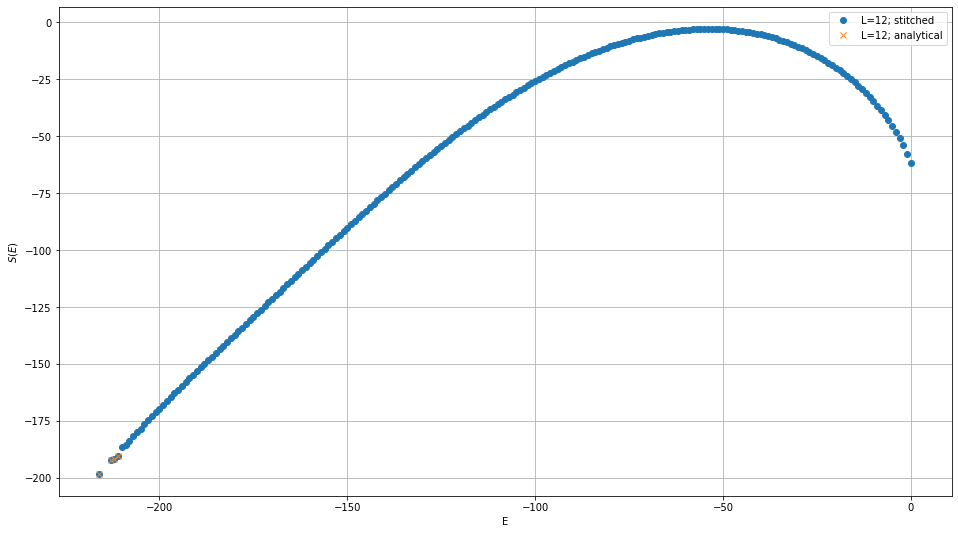

In [24]:
plt.figure(figsize=(16, 9))
lst = [12]

for L in lst:
    
    plt.plot([E for E in stitched], [S for E, S in stitched.items()], 'o', label="L={}; stitched".format(heat["L"]))
    
    plt.plot([E for E in analytical], [S for E, S in analytical.items()], 'o', label="L={}; analytical".format(heat["L"]),
            marker = "x")

plt.ylabel("$S(E)$")
plt.xlabel("E")
#plt.ylim([-200, -175])
#plt.xlim([-225, -200])
plt.legend()
plt.grid()

In [25]:
L = 12
name = "./marina_datasets/out_density_{}_q4_honey_3n2_avg_LL.txt".format(L)
Marina = od()
with open(name) as f:
    for E, line in enumerate(f):
        S = float(line)
        Marina[E - 3 * L * L / 2  + 3] = S
Marina

OrderedDict([(-213.0, 1.386294),
             (-212.0, 7.6632532308),
             (-211.0, 8.7711590769),
             (-210.0, 11.409873),
             (-209.0, 13.1827179231),
             (-208.0, 14.9133491538),
             (-207.0, 17.5330619231),
             (-206.0, 18.9727927692),
             (-205.0, 20.7424786923),
             (-204.0, 23.0453153846),
             (-203.0, 24.4870467692),
             (-202.0, 26.2453063077),
             (-201.0, 28.3445126923),
             (-200.0, 29.9265795385),
             (-199.0, 31.6237420769),
             (-198.0, 33.4829996154),
             (-197.0, 35.1218848462),
             (-196.0, 36.8505533077),
             (-195.0, 38.5363247692),
             (-194.0, 40.2405467692),
             (-193.0, 41.8511960769),
             (-192.0, 43.5665802308),
             (-191.0, 45.2492386923),
             (-190.0, 46.8854796154),
             (-189.0, 48.5480855385),
             (-188.0, 50.1194491538),
             (-187.0, 5

In [26]:
L = 12
name = "./marina_datasets/L{}_honey.csv".format(L)
Marina = od()
count = 0
with open(name) as f:
    for line in f:
        if count:
            E, S = map(float, line.split(";"))
            Marina[-E] = S
        count += 1
Marina

OrderedDict([(-216.0, 1.386294),
             (-213.0, 7.494113),
             (-212.0, 7.888123),
             (-211.0, 9.29432),
             (-210.0, 12.883161),
             (-209.0, 14.010801),
             (-208.0, 15.583148),
             (-207.0, 18.068056),
             (-206.0, 19.550826),
             (-205.0, 21.192531),
             (-204.0, 23.204718),
             (-203.0, 24.82688),
             (-202.0, 26.50042),
             (-201.0, 28.323929),
             (-200.0, 29.994314),
             (-199.0, 31.667071),
             (-198.0, 33.360332),
             (-197.0, 35.010433),
             (-196.0, 36.679489),
             (-195.0, 38.334652),
             (-194.0, 39.974577),
             (-193.0, 41.588935),
             (-192.0, 43.222693),
             (-191.0, 44.854681),
             (-190.0, 46.468708),
             (-189.0, 48.093411),
             (-188.0, 49.717321),
             (-187.0, 51.350459),
             (-186.0, 52.918985),
             (-185.0,

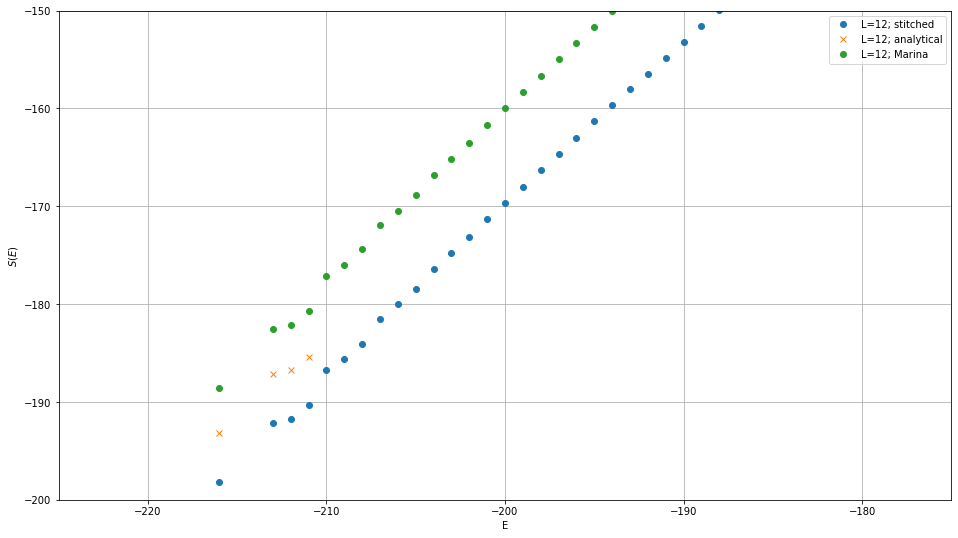

In [27]:
plt.figure(figsize=(16, 9))
lst = [12]

for L in lst:
    
    plt.plot([E for E in stitched], [S for E, S in stitched.items()], 'o', label="L={}; stitched".format(heat["L"]))
    
    plt.plot([E for E in analytical], [S + 5 for E, S in analytical.items()], 'o', label="L={}; analytical".format(heat["L"]),
            marker = "x")
    
    plt.plot([E for E in Marina], [S - 190 for E, S in Marina.items()], 'o', label="L={}; Marina".format(heat["L"]))


plt.ylabel("$S(E)$")
plt.xlabel("E")

plt.ylim([-200, -150])
plt.xlim([-225, -175])

plt.legend()
plt.grid()

R movement